## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import aux_functions as f

## 0.Read data

In [3]:
df_total_payments = pd.read_csv("../Datasets/clean_total_payments.csv", index_col=0)
df_purchase_orders = pd.read_csv("../Datasets/clean_purchase_orders.csv", index_col=0)
df_customer = pd.read_csv("../Datasets/clean_customer.csv", index_col=0)
df_employees = pd.read_csv("../Datasets/clean_employees.csv", index_col=0)
df_inventory = pd.read_csv("../Datasets/clean_inventory.csv", index_col=0)
df_order_details = pd.read_csv("../Datasets/clean_order_details.csv", index_col=0)
df_orders = pd.read_csv("../Datasets/clean_orders.csv", index_col=0)
df_products = pd.read_csv("../Datasets/clean_products.csv", index_col=0)

## 1. Customers

In [4]:
df_customer

,CustomerID,CustomerName,Region,Country,PriceCategory,CustomerClass,LeadSource,Discontinued
0,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
1,2,C2,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
2,3,C3,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,1
3,4,C4,Moscow,Russian Federation,4,Large-Scale Wholesaler-1,Referral by the Central Office,1
4,5,C5,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
...,...,...,...,...,...,...,...,...
220,243,C221,Vologda,Russian Federation,4,Small-Scale Wholesaler,Advertisement in National Wholesale Magazine,0
221,244,C222,Yakutsk,Russian Federation,4,Small-Scale Wholesaler,Advertisement in National Wholesale Magazine,0
222,245,C223,Nizhny Novgorod,Russian Federation,5,Retailer,Sales Calls or Visits,0
223,246,C224,Kemerovo,Russian Federation,4,Small-Scale Wholesaler,Sales Calls or Visits,0


Country
Russian Federation    222
Belarus                 3
Name: count, dtype: int64


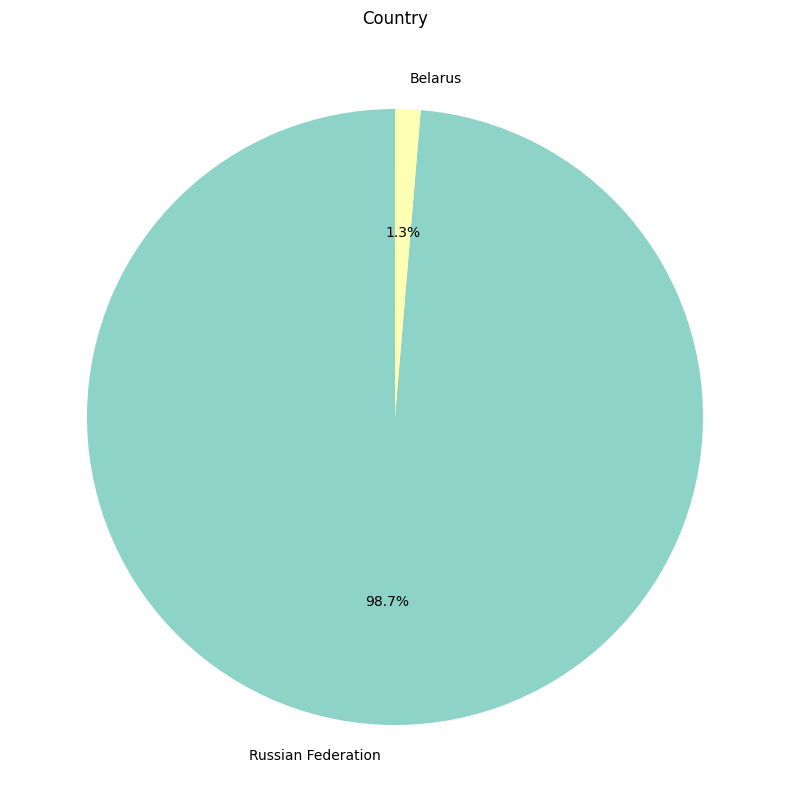

In [5]:
f.piechart(df_customer, 'Country', 0.001)

Region
Moscow              62
Chelyabinsk          7
Khabarovsk           6
Saint Petersburg     6
Perm                 5
                    ..
Maloyaroslavets      1
Smolensk             1
Naryan-Mar           1
Dolgoprudny          1
Yakutsk              1
Name: count, Length: 87, dtype: int64


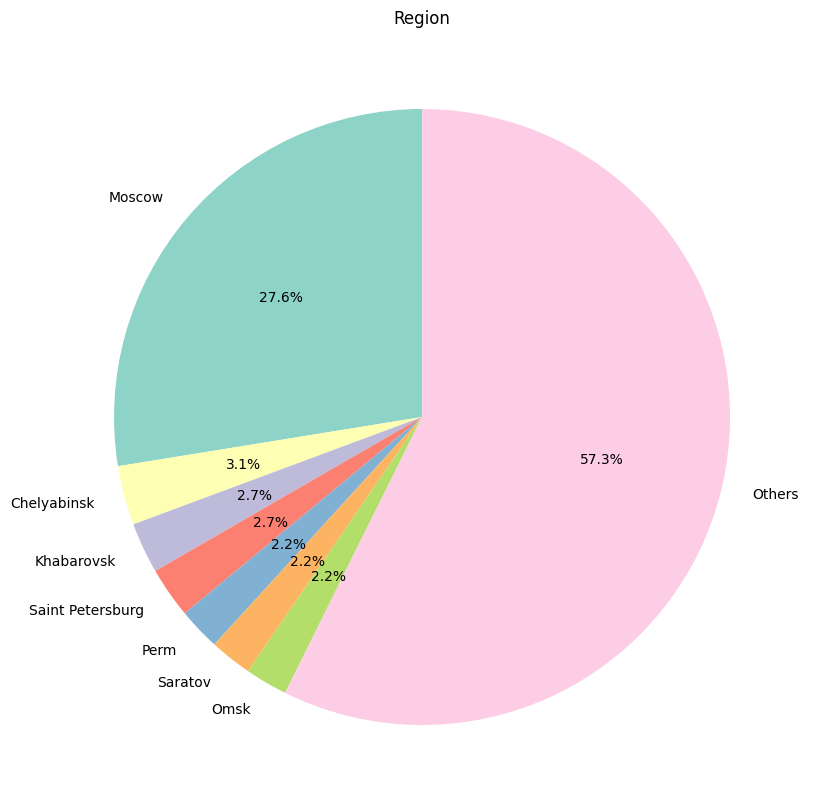

In [11]:
f.piechart(df_customer, 'Region', 0.018)

In [12]:
df_customer.columns

Index(['CustomerID', 'CustomerName', 'Region', 'Country', 'PriceCategory',
       'CustomerClass', 'LeadSource', 'Discontinued'],
      dtype='object')

Intentar ver la relación entre price category, customerclass, leadsource

Discontinued
0    199
1     26
Name: count, dtype: int64


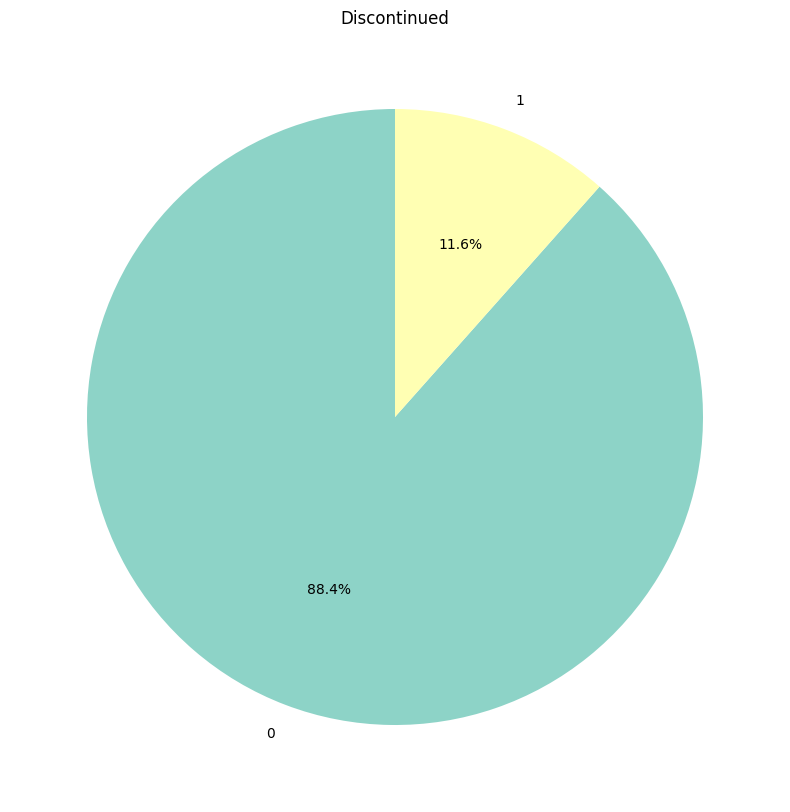

In [20]:
f.piechart(df_customer, 'Discontinued', 0.02)

LeadSource
Advertisement in National Wholesale Magazine     93
Sales Calls or Visits                            56
Referral by the Central Office                   50
Other                                            14
Trade Shows                                       3
Referral by Third Parties                         3
Organic Search                                    1
Advertisement in Regional Wholesaler Magazine     1
Name: count, dtype: int64


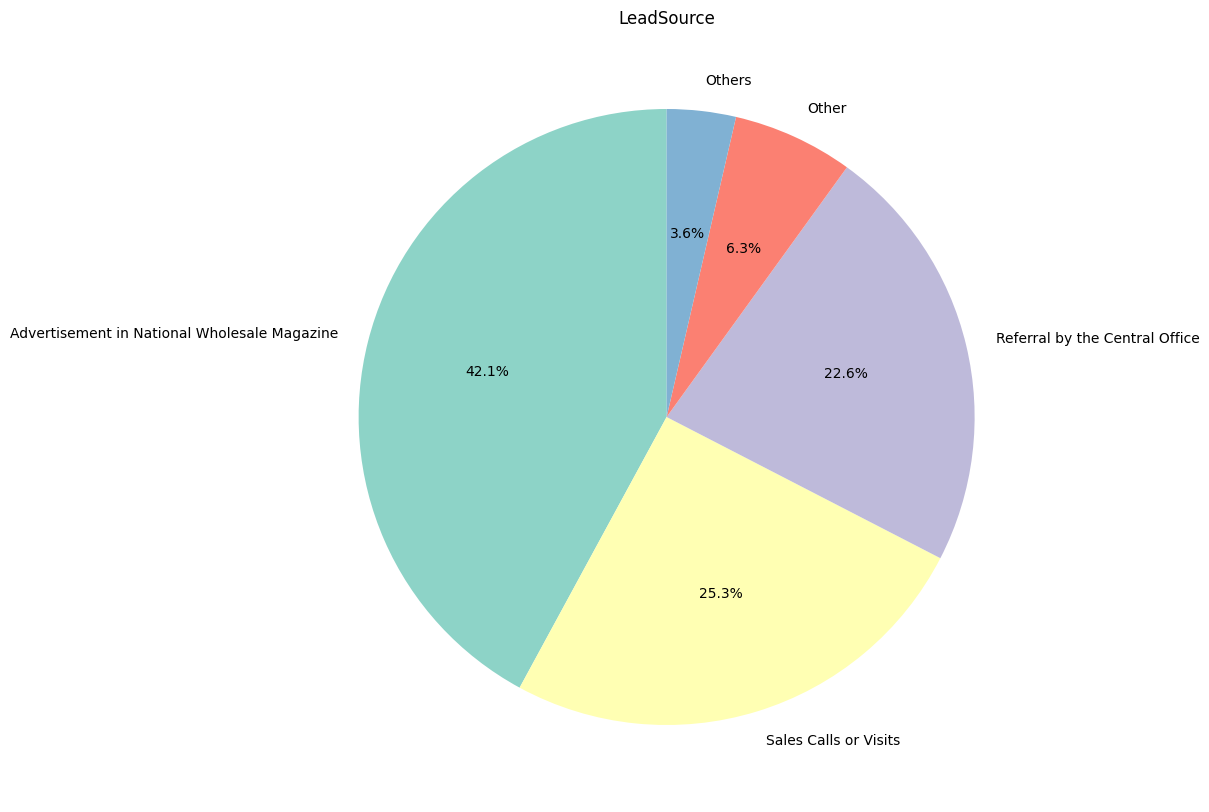

In [19]:
f.piechart(df_customer, 'LeadSource', 0.02)

CustomerClass
Small-Scale Wholesaler      95
Retailer                    69
Large-Scale Wholesaler-1    41
Large-Scale Wholesaler-2    15
Consumer                     3
Branch                       1
HyPermarket                  1
Name: count, dtype: int64


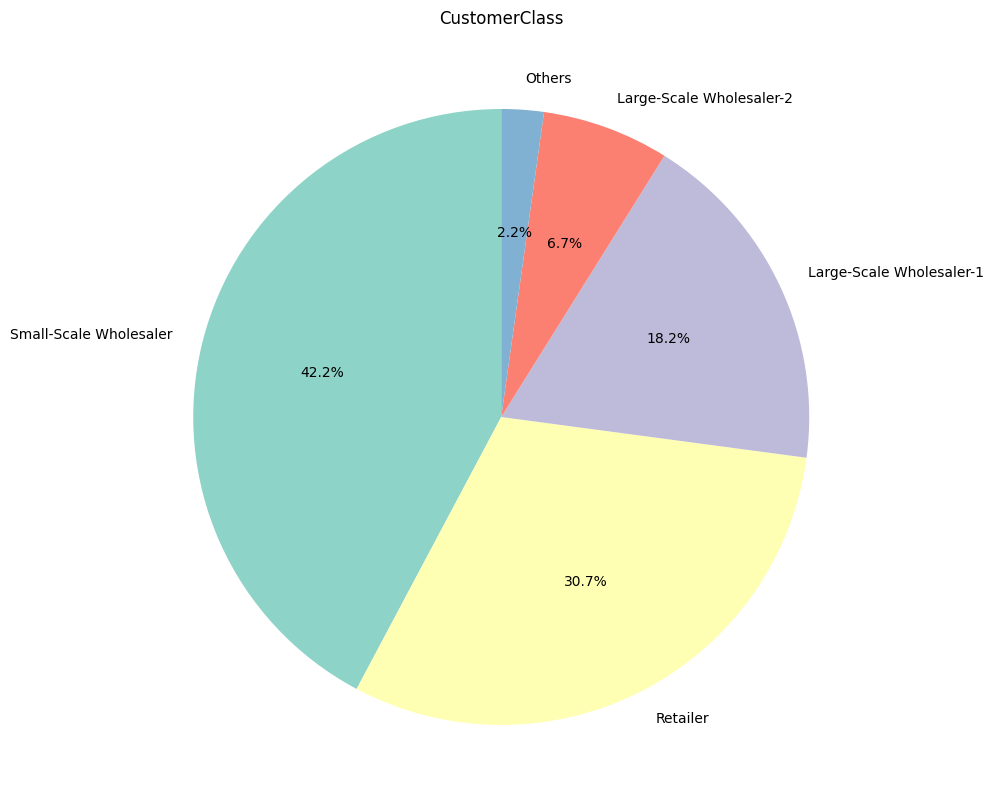

In [17]:
f.piechart(df_customer, 'CustomerClass' , 0.02)

PriceCategory
5    83
4    81
1    41
2    16
7     2
6     1
3     1
Name: count, dtype: int64


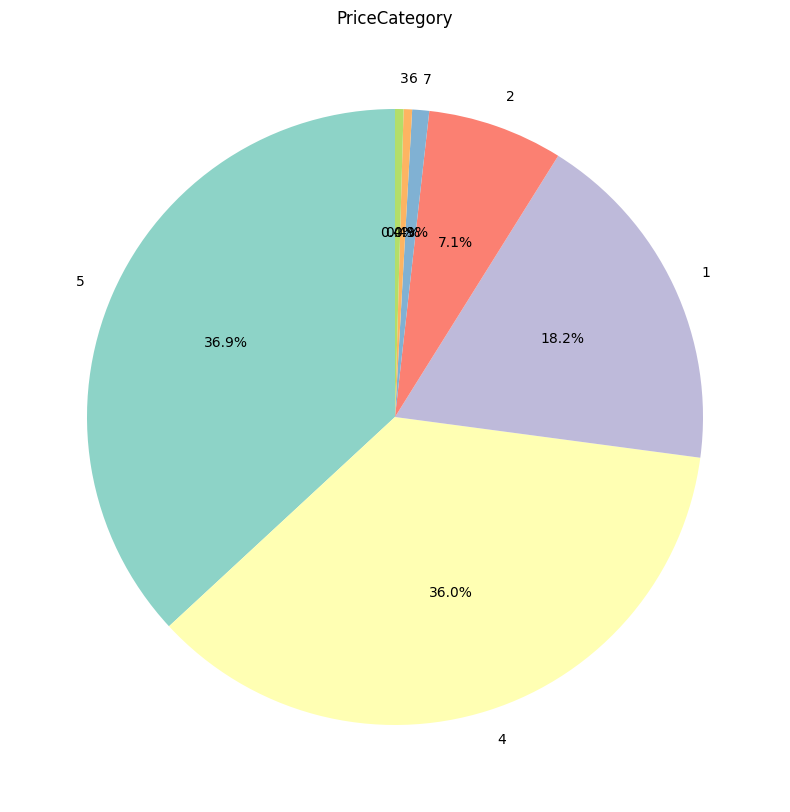

In [14]:
f.piechart(df_customer, 'PriceCategory', 0.001)

C:\Users\Carlota\AppData\Local\Temp\ipykernel_11680\3077091674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="CustomerID", data=df_region, palette="viridis")


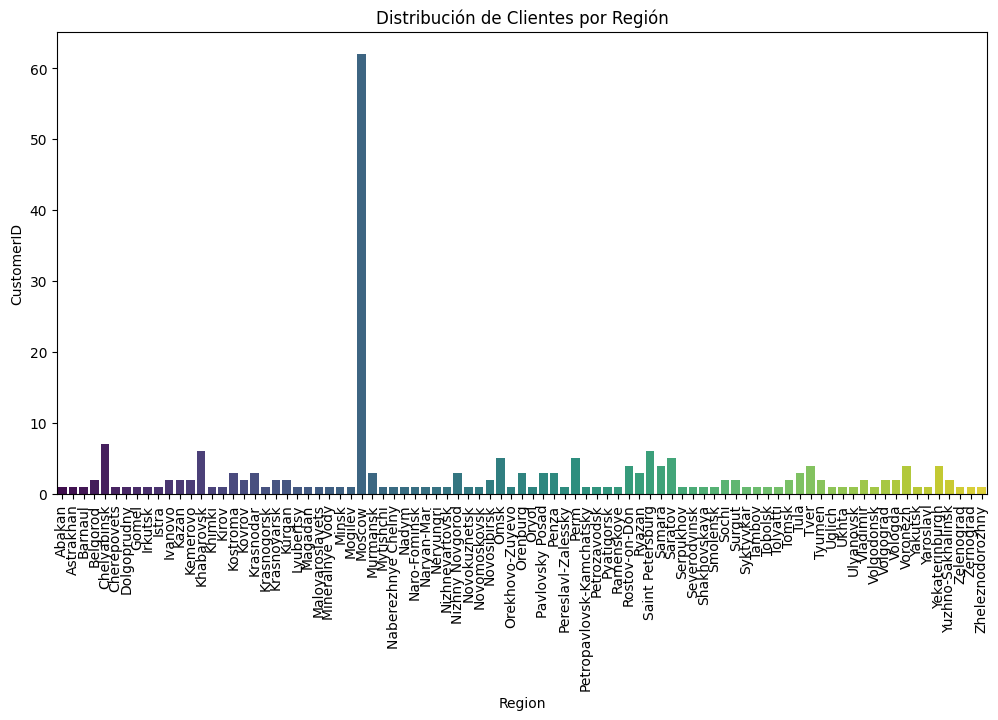

In [ ]:
# Agrupar clientes por región
df_region = df_customer.groupby("Region")["CustomerID"].count().reset_index()

# Graficar mapa de clientes
plt.figure(figsize=(12,6))
sns.barplot(x="Region", y="CustomerID", data=df_region, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribución de Clientes por Región")
plt.show()


Intentar ver la relación entre price category, customerclass, leadsource

In [22]:
df_customer.columns

Index(['CustomerID', 'CustomerName', 'Region', 'Country', 'PriceCategory',
       'CustomerClass', 'LeadSource', 'Discontinued'],
      dtype='object')

In [28]:
df_customer.groupby('CustomerClass').agg({
    'LeadSource': lambda x: ', '.join(map(str, x.unique())),
    'PriceCategory': lambda x: ', '.join(map(str, x.unique()))
})


,LeadSource,PriceCategory
CustomerClass,,
Branch,Other,6
Consumer,Other,"1, 5, 7"
HyPermarket,Other,3
Large-Scale Wholesaler-1,"Referral by the Central Office, Other, Sales C...","1, 4, 2"
Large-Scale Wholesaler-2,"Referral by the Central Office, Advertisement ...","2, 5, 1"
Retailer,"Other, Advertisement in National Wholesale Mag...","5, 7, 4"
Small-Scale Wholesaler,"Advertisement in National Wholesale Magazine, ...","4, 5, 2"


### 1.1 Total de ventas por región

In [47]:
df_ventas_region = df_customer.merge(df_orders, on="CustomerID").merge(df_total_payments, on="OrderID")
df_ventas_region

,CustomerID,CustomerName,Region,Country,PriceCategory,CustomerClass,LeadSource,Discontinued,OrderID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge,PaymentMethod,PaymentID,PaymentDate,PaymentAmount
0,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,2,1,1.0,7/10/2003,7/10/2003,0.0,Cash,1.0,7/10/2003,603.50
1,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,26,1,1.0,7/24/2003,7/24/2003,0.0,Cash,27.0,7/24/2003,1457.00
2,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,86,1,1.0,8/19/2003,8/19/2003,0.0,Cash,89.0,8/19/2003,2348.20
3,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,158,2,1.0,9/23/2003,9/23/2003,0.0,Cash,163.0,9/23/2003,726.30
4,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,299,2,1.0,11/18/2003,11/18/2003,0.0,Cash,299.0,11/18/2003,1585.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,186,C168,Saint Petersburg,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,1541,6,1.0,3/9/2005,3/9/2005,31.0,Cash,697.0,3/9/2005,954.95
680,186,C168,Saint Petersburg,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,1546,12,1.0,3/11/2005,3/11/2005,31.0,Cash,698.0,3/11/2005,1233.00
681,186,C168,Saint Petersburg,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,1662,6,1.0,6/4/2005,6/4/2005,31.0,Cash,699.0,6/4/2005,2163.60
682,208,C189,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,1864,1,1.0,8/9/2005,8/9/2005,31.0,Cash,692.0,8/22/2005,625.00


In [48]:
df_ventas_region = df_ventas_region.groupby('Region').agg(
    TotalVentas = ('PaymentAmount', 'sum'), 
    NumeroClientes = ('CustomerID', 'nunique')
    ).reset_index()
df_ventas_region

,Region,TotalVentas,NumeroClientes
0,Chelyabinsk,4129.47,1
1,Khabarovsk,13028.87,1
2,Kirov,11541.96,1
3,Krasnogorsk,366.90,1
4,Mogilev,506.20,1
5,Moscow,586422.08,40
6,Murmansk,21930.14,2
7,Nizhny Novgorod,6632.27,1
8,Novomoskovsk,466.10,1
9,Omsk,14149.33,2


In [50]:
df_ventas_region = df_ventas_region.sort_values(by='TotalVentas', ascending=False)
df_ventas_region

,Region,TotalVentas,NumeroClientes
5,Moscow,586422.08,40
13,Perm,95752.79,2
23,Yekaterinburgh,34832.75,2
6,Murmansk,21930.14,2
14,Saint Petersburg,15040.55,1
19,Surgut,14229.43,2
9,Omsk,14149.33,2
22,Voronezh,13645.28,2
1,Khabarovsk,13028.87,1
2,Kirov,11541.96,1


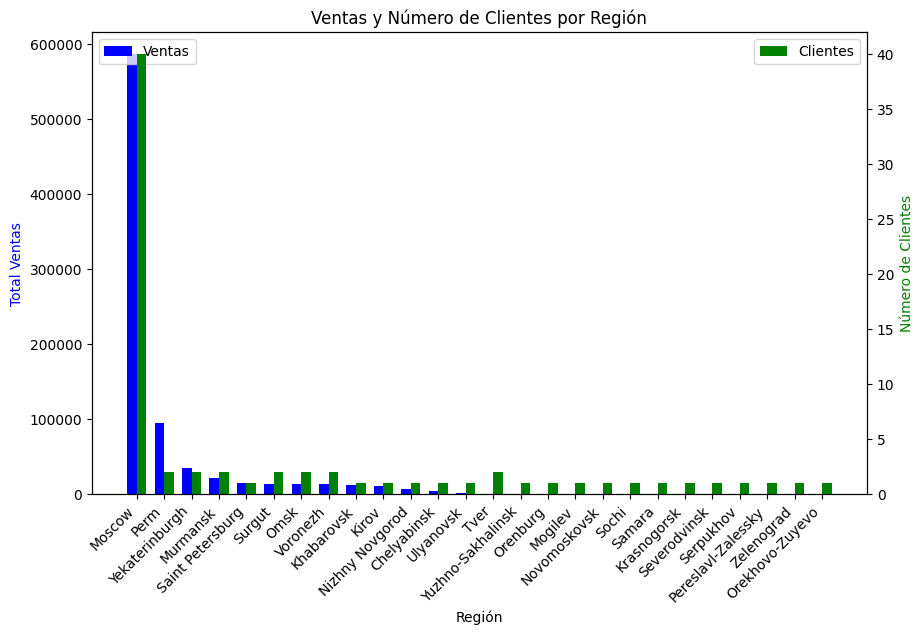

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x = np.arange(len(df_ventas_region))  
width = 0.35  

# Gráfico de barras para las ventas
bars1 = ax1.bar(x - width / 2, df_ventas_region['TotalVentas'], width, label='Ventas', color='blue')

# Crear un segundo eje Y para las barras de clientes
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width / 2, df_ventas_region['NumeroClientes'], width, label='Clientes', color='green')

# Etiquetas y título
ax1.set_xlabel('Región')
ax1.set_ylabel('Total Ventas', color='blue')
ax2.set_ylabel('Número de Clientes', color='green')
ax1.set_xticks(x)
ax1.set_xticklabels(df_ventas_region['Region'], rotation=45, ha="right")  # Rotación de 45 grados


ax1.set_title('Ventas y Número de Clientes por Región')

# Leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

### Número de pedidos por cliente

In [53]:
df_orders

,OrderID,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge
0,2,1,1,1.0,7/10/2003,7/10/2003,0.0
1,4,2,2,1.0,7/11/2003,7/11/2003,0.0
2,5,2,1,1.0,7/15/2003,7/15/2003,0.0
3,6,3,1,1.0,7/14/2003,7/14/2003,0.0
4,7,4,1,1.0,7/14/2003,7/15/2003,0.0
...,...,...,...,...,...,...,...
2281,2466,40,8,1.0,4/14/2006,4/14/2006,0.0
2282,2467,7,8,1.0,4/14/2006,4/14/2006,0.0
2283,2468,82,8,1.0,4/18/2006,4/18/2006,31.0
2284,2469,231,8,1.0,4/19/2006,4/19/2006,0.0


In [66]:
df_pedidos_clientes = df_orders.merge(df_order_details, on = 'OrderID')
df_pedidos_clientes = df_pedidos_clientes.merge(df_customer, on = 'CustomerID')
df_pedidos_clientes = df_pedidos_clientes.merge(df_total_payments, on = 'OrderID')
df_pedidos_clientes

,OrderID,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge,OrderDetailID,ProductID,QuantitySold,...,Region,Country,PriceCategory,CustomerClass,LeadSource,Discontinued,PaymentMethod,PaymentID,PaymentDate,PaymentAmount
0,2,1,1,1.0,7/10/2003,7/10/2003,0.0,2,955,5,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1.0,7/10/2003,603.50
1,2,1,1,1.0,7/10/2003,7/10/2003,0.0,3,958,5,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1.0,7/10/2003,603.50
2,2,1,1,1.0,7/10/2003,7/10/2003,0.0,5,959,5,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1.0,7/10/2003,603.50
3,2,1,1,1.0,7/10/2003,7/10/2003,0.0,8,715,30,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1.0,7/10/2003,603.50
4,2,1,1,1.0,7/10/2003,7/10/2003,0.0,9,421,10,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1.0,7/10/2003,603.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,1864,208,1,1.0,8/9/2005,8/9/2005,31.0,80085,3128,10,...,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,Cash,693.0,9/10/2005,526.32
22072,1864,208,1,1.0,8/9/2005,8/9/2005,31.0,80086,3126,10,...,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,Cash,692.0,8/22/2005,625.00
22073,1864,208,1,1.0,8/9/2005,8/9/2005,31.0,80086,3126,10,...,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,Cash,693.0,9/10/2005,526.32
22074,1864,208,1,1.0,8/9/2005,8/9/2005,31.0,80087,3131,9,...,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,Cash,692.0,8/22/2005,625.00


Los clientes que f

In [69]:
df_ventas_lead = df_pedidos_clientes.groupby(['LeadSource', 'CustomerID']).agg(
    TotalVentas = ('PaymentAmount', 'sum'),
    NumeroPedidos = ('OrderID', 'count')).reset_index().sort_values(by='TotalVentas', ascending=False)

In [70]:
df_ventas_lead

,LeadSource,CustomerID,TotalVentas,NumeroPedidos
52,Referral by the Central Office,13,12171699.78,1317
49,Referral by the Central Office,5,10850843.52,2646
46,Referral by the Central Office,2,7661120.01,3020
59,Referral by the Central Office,24,3589240.10,984
12,Advertisement in National Wholesale Magazine,42,3327990.63,612
...,...,...,...,...
8,Advertisement in National Wholesale Magazine,31,1513.20,13
39,Other,32,799.93,32
38,Other,9,544.70,17
2,Advertisement in National Wholesale Magazine,15,112.40,4


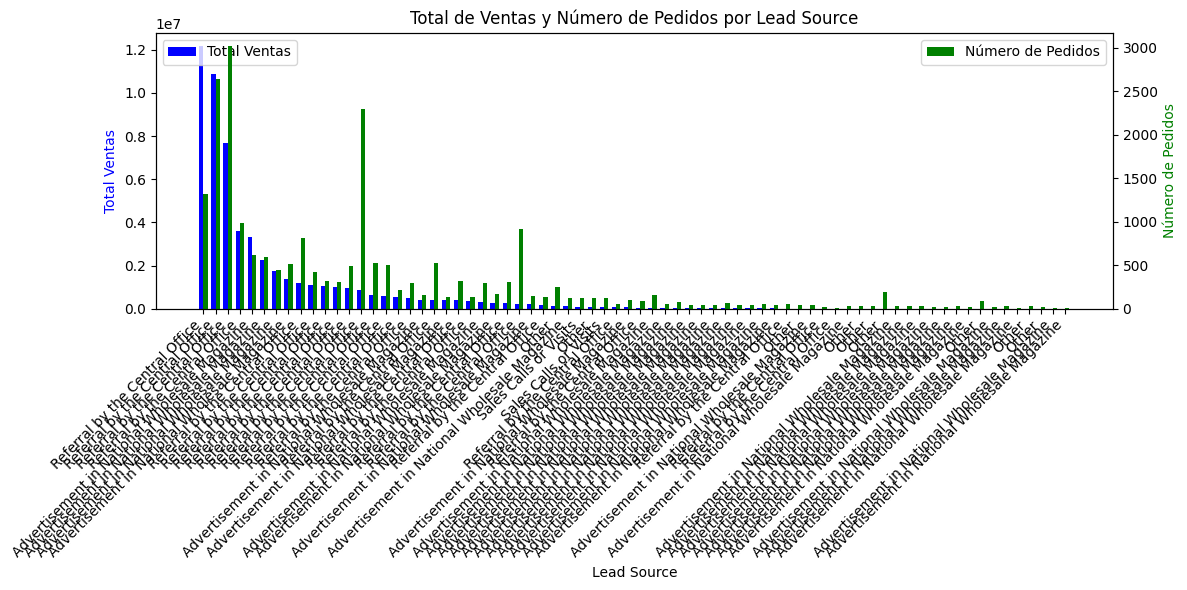

In [71]:
import matplotlib.pyplot as plt
import numpy as np


# Configuración para el gráfico de barras dobles
fig, ax1 = plt.subplots(figsize=(12, 6))

# Las posiciones para las barras
x = np.arange(len(df_ventas_lead))  # Posiciones para las barras en el eje X
width = 0.35  # Ancho de las barras

# Gráfico de barras para las ventas
bars1 = ax1.bar(x - width / 2, df_ventas_lead['TotalVentas'], width, label='Total Ventas', color='blue')

# Crear un segundo eje Y para las barras de clientes
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width / 2, df_ventas_lead['NumeroPedidos'], width, label='Número de Pedidos', color='green')

# Etiquetas y título
ax1.set_xlabel('Lead Source')
ax1.set_ylabel('Total Ventas', color='blue')
ax2.set_ylabel('Número de Pedidos', color='green')
ax1.set_xticks(x)
ax1.set_xticklabels(df_ventas_lead['LeadSource'], rotation=45, ha="right")  # Rotación de 45 grados

# Título del gráfico
ax1.set_title('Total de Ventas y Número de Pedidos por Lead Source')

# Leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta para que no se solapen las etiquetas
plt.show()


### Fuente de clientes más rentable

Podemos observar como en nuestro caso, la fuente de captación de clientes más rentable es **Advertisement in National Wholesale Magazine** debido a que con un número relativamente bajo de clientes obtenemos un alto valor medio de las ventas. 

In [75]:
df_pedidos_clientes.groupby(['LeadSource']).agg(
    TotalVentas = ('PaymentAmount', 'mean'),
    NumeroPedidos = ('OrderID', 'count')).reset_index().sort_values(by='TotalVentas', ascending = False)

,LeadSource,TotalVentas,NumeroPedidos
2,Referral by the Central Office,2669.532854,16716
0,Advertisement in National Wholesale Magazine,2504.356776,4315
3,Sales Calls or Visits,656.092678,239
1,Other,292.049045,806


### Relación entre el costo de envío y el total de ventas por cliente

In [78]:
df_pedidos_clientes.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'ShippingMethodID', 'OrderDate',
       'ShipDate', 'FreightCharge', 'OrderDetailID', 'ProductID',
       'QuantitySold', 'UnitSalesPrice', 'CustomerName', 'Region', 'Country',
       'PriceCategory', 'CustomerClass', 'LeadSource', 'Discontinued',
       'PaymentMethod', 'PaymentID', 'PaymentDate', 'PaymentAmount'],
      dtype='object')

In [91]:
df_cliente = df_pedidos_clientes.groupby(['Region', 'CustomerID', 'PriceCategory',  'CustomerClass' ]).agg(
    TotalVentas = ('PaymentAmount', 'sum'), 
    TotalFreightCharge = ('FreightCharge', 'sum'), 
    TotalQuantity = ('QuantitySold', 'sum')
).reset_index()
df_cliente

,Region,CustomerID,PriceCategory,CustomerClass,TotalVentas,TotalFreightCharge,TotalQuantity
0,Chelyabinsk,64,1,Large-Scale Wholesaler-1,982744.13,13636.00,729
1,Khabarovsk,41,4,Small-Scale Wholesaler,1396208.61,0.00,2937
2,Kirov,60,4,Small-Scale Wholesaler,1763829.84,12544.80,2391
3,Krasnogorsk,68,5,Retailer,15409.80,0.00,82
4,Mogilev,33,5,Retailer,9684.40,0.00,82
...,...,...,...,...,...,...,...
67,Voronezh,34,4,Small-Scale Wholesaler,418277.30,0.00,1486
68,Yekaterinburgh,24,1,Large-Scale Wholesaler-1,3589240.10,11230.18,8496
69,Yekaterinburgh,84,1,Large-Scale Wholesaler-1,384914.65,0.00,1198
70,Yuzhno-Sakhalinsk,74,4,Small-Scale Wholesaler,83865.25,0.00,158


In [92]:
df_cliente['FreightVsVentas'] = df_cliente['TotalFreightCharge'] / df_cliente['TotalVentas']

In [99]:
df_cliente_sorted = df_cliente.sort_values(by='FreightVsVentas', ascending=False)
df_cliente_sorted.head(60)

,Region,CustomerID,PriceCategory,CustomerClass,TotalVentas,TotalFreightCharge,TotalQuantity,FreightVsVentas
44,Moscow,208,2,Large-Scale Wholesaler-2,49506.76,2666.00,754,0.053851
52,Orenburg,69,5,Retailer,40146.24,1597.14,121,0.039783
65,Ulyanovsk,54,5,Retailer,57333.74,1690.49,593,0.029485
0,Chelyabinsk,64,1,Large-Scale Wholesaler-1,982744.13,13636.00,729,0.013875
56,Saint Petersburg,186,1,Large-Scale Wholesaler-1,1017347.55,8370.00,2358,0.008227
47,Nizhny Novgorod,25,1,Large-Scale Wholesaler-1,382699.70,2959.75,1529,0.007734
2,Kirov,60,4,Small-Scale Wholesaler,1763829.84,12544.80,2391,0.007112
45,Murmansk,42,4,Small-Scale Wholesaler,3327990.63,14945.87,5657,0.004491
68,Yekaterinburgh,24,1,Large-Scale Wholesaler-1,3589240.10,11230.18,8496,0.003129
55,Perm,13,1,Large-Scale Wholesaler-1,12171699.78,11445.08,21394,0.000940


### **Estudio clientes**
- ¿Cuánto gastan en promedio y con qué frecuencia compran?
- ¿Se podrían segmentar los clientes para ofrecerles estrategias personalizadas? --> Habría que sacar la última compra del cliente, la frecuencia con la que compran y cuanto gastan en total (Se puede hacer con RFM Analysis)
- Sacar un mapa de los clientes (sería interesante para el dashboard)


### **Análisis de Ventas**

- Total de Ventas, con ello estudiaremos cuales son los productos que más ingresos generan
- Productos más vendidos, identificaremos los productos con mayor cantidad vendida
- Ingresos por categoría, veremos que categoria de productos produce más ingresos
- Tendencias temporales

In [101]:
df_ventas = df_order_details.merge(df_products, on = 'ProductID')
df_ventas

,OrderDetailID,OrderID,ProductID,QuantitySold,UnitSalesPrice,ProductName,Color,ModelDescription,FabricDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice
0,2,2,955,5,7.5,XXL-PCL29,NaN,PCL,29,Drawers,Women's Panties,Underwear,997,XXL,Dozen,In Production,7/10/2003,7.15
1,3,2,958,5,8.5,XXL-PCL31S,NaN,PCL,31,Drawers,Women's Panties,Underwear,1110,XXL,Dozen,In Production,7/10/2003,8.30
2,5,2,959,5,8.5,XXL-PCL31T,NaN,PCL,31,Drawers,Women's Panties,Underwear,1055,XXL,Dozen,In Production,7/10/2003,7.20
3,6,4,72,50,3.0,2-ERK61,NaN,ERK,61,Briefs,Boys' Briefs,Underwear,233,2,Dozen,In Production,7/10/2003,2.50
4,7,4,9,50,3.2,3-ERK61,NaN,ERK,61,Briefs,Boys' Briefs,Underwear,325,3,Dozen,In Production,7/10/2003,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105752,114665,2470,4342,20,1.7,M-BX46KK,NaN,BX,46,Boxers,Men's Briefs,Underwear,75,M,Single Unit,In Production,3/20/2006,1.20
105753,114666,2470,4419,10,1.9,L-BX46CK,NaN,BX,46,Boxers,Men's Briefs,Underwear,90,L,Single Unit,In Production,4/4/2006,1.30
105754,114667,2470,4343,20,1.9,L-BX46KK,NaN,BX,46,Boxers,Men's Briefs,Underwear,85,L,Single Unit,In Production,3/20/2006,1.30
105755,114668,2470,4421,10,2.1,XL-BX46CK,NaN,BX,46,Boxers,Men's Briefs,Underwear,100,XL,Single Unit,In Production,4/4/2006,1.40


#### 1. Total de Ventas

In [102]:
df_ventas.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'ProductName', 'Color', 'ModelDescription',
       'FabricDescription', 'Category', 'Gender', 'ProductLine', 'Weight',
       'Size', 'PackSize', 'Status', 'InventoryDate', 'PurchasePrice'],
      dtype='object')

In [103]:
df_ventas['TotalVentas'] = df_ventas['UnitSalesPrice'] * df_ventas['QuantitySold']

In [115]:
df_ventas['TotalVentas'].sum() #en el dashboard convendria sacar las ventas del ultimo año

np.float64(3953248.07)

Los productos que más ingresos generan son *Briefs* y *Drawers*

In [107]:
df_ventas.groupby(['ProductName', 'ModelDescription', 'Category'])['TotalVentas'].sum().reset_index().sort_values(by='TotalVentas', ascending= False).head(50)

,ProductName,ModelDescription,Category,TotalVentas
2016,M-ERK61,ERK,Briefs,34526.2
1101,L-ERK61,ERK,Briefs,31979.5
3896,XXL-K46,K,Briefs,28693.7
3576,XL-K46,K,Briefs,28068.3
475,3XL-K46,K,Briefs,25395.8
3477,XL-ERK61,ERK,Briefs,25203.3
1217,L-K46,K,Briefs,24194.0
3916,XXL-K4673,K,Briefs,22387.8
338,3-ERK61,ERK,Briefs,22091.6
3596,XL-K4673,K,Briefs,22009.8


### 2. Productos más vendidos

Los que se venden más cantidad son a su vez los mismos que más ventas generan

In [138]:
df_ventas.groupby(['ProductName', 'ModelDescription', 'Category']).agg(
    TotalVentas = ('TotalVentas', 'sum'), 
    TotalQuantity = ('QuantitySold', 'sum')).reset_index().sort_values(by='TotalQuantity', ascending= False)

,ProductName,ModelDescription,Category,TotalVentas,TotalQuantity
2016,M-ERK61,ERK,Briefs,34526.2,7517
1101,L-ERK61,ERK,Briefs,31979.5,6230
338,3-ERK61,ERK,Briefs,22091.6,6193
204,2-ERK61,ERK,Briefs,18601.3,5588
2789,S-ERK61,ERK,Briefs,21579.3,5166
...,...,...,...,...,...
3490,XL-FF461208S,FF,Briefs,9.1,1
4019,XXL-S46S,S,Briefs,7.8,1
1881,M-BX46CB,BX,Boxers,1.2,1
2399,M-TEE1081S,TEE,Thongs,0.0,0


### 3. Ingresos por categoría vs margen de ganancia

In [116]:
df_ventas.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'ProductName', 'Color', 'ModelDescription',
       'FabricDescription', 'Category', 'Gender', 'ProductLine', 'Weight',
       'Size', 'PackSize', 'Status', 'InventoryDate', 'PurchasePrice',
       'TotalVentas'],
      dtype='object')

In [126]:
df_ventas['ProfitMargin'] = df_ventas['UnitSalesPrice'] - df_ventas['PurchasePrice']
df_ventas['ProfitMarginPercentage'] = df_ventas['ProfitMargin'] / df_ventas['PurchasePrice']
df_ventas['ProfitMarginTotal'] = df_ventas['ProfitMargin'] * df_ventas['QuantitySold']

In [129]:
df_resultado = df_ventas.groupby('Category').agg(
    TotalSales = ('TotalVentas', 'sum'), 
    RealProfit = ('ProfitMarginTotal', 'sum'), 
    TotalQuantity = ('QuantitySold', 'sum')
    ).reset_index().sort_values(by = 'RealProfit', ascending=False)

In [132]:
df_resultado['ProfitMargin%'] = (df_resultado['RealProfit'] / df_resultado['TotalSales']) * 100
df_resultado = df_resultado.sort_values(by='ProfitMargin%', ascending=False)
df_resultado

,Category,TotalSales,RealProfit,TotalQuantity,ProfitMargin%
4,Cuff-Over the Calf,407.80,177.70,39,43.575282
6,Regular-Over the Calf,25922.20,11166.20,3180,43.075819
7,Slips,2336.10,929.15,2300,39.773554
8,Thongs,171663.60,60585.55,32385,35.293184
9,Undershirts,259518.20,91389.79,36118,35.215176
3,Bustier,324.60,105.30,129,32.439926
1,Boxers,67460.20,21243.80,43246,31.490864
2,Briefs,3264980.37,932657.43,548564,28.565484
5,Drawers,159861.20,40285.51,16211,25.200305
0,Any,773.80,131.90,1834,17.045748


Vale, aqui observamos que a pesar de ser nuestra mejor categoria 'Briefs' no es la que más beneficios obtenemos. Dos medidas:
- Regular el precio
- Potenciar las ventas de otros productos con mayor rentabilidad que ya vendemos bastante como *Thongs* o *Undershits*

### 4. Margen de ganancia por producto

In [133]:
df_ventas.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'ProductName', 'Color', 'ModelDescription',
       'FabricDescription', 'Category', 'Gender', 'ProductLine', 'Weight',
       'Size', 'PackSize', 'Status', 'InventoryDate', 'PurchasePrice',
       'TotalVentas', 'ProfitMargin', 'ProfitMarginPercentage',
       'ProfitMarginTotal'],
      dtype='object')

In [143]:
average_profit = df_ventas.groupby(['ProductName', 'Category'])['ProfitMarginPercentage'].mean().reset_index()
average_profit

,ProductName,Category,ProfitMarginPercentage
0,1-157,Undershirts,0.686047
1,1-158,Undershirts,0.755208
2,1-160,Undershirts,0.777778
3,1-161,Undershirts,0.626894
4,1-162,Undershirts,0.620873
...,...,...,...
4037,XXL-SLP46S,Slips,0.538462
4038,XXL-SLP46SD,Slips,0.552941
4039,XXL-U29,Briefs,0.593915
4040,XXL-U35,Briefs,0.439241


In [147]:
top_10 = average_profit.sort_values(by='ProfitMarginPercentage', ascending=False).head(10)
top_10

,ProductName,Category,ProfitMarginPercentage
3066,S-TIEE03S,Thongs,2.225000
1984,M-EE1206,Briefs,2.190476
3065,S-TIEE03,Thongs,2.137500
1986,M-EE1206S,Briefs,1.934087
1070,L-EE1205S1,Briefs,1.900000
2934,S-TA7800S,Thongs,1.847440
2778,S-EE1206S,Briefs,1.798611
1985,M-EE12061,Briefs,1.721212
2429,M-TIEE1405S,Thongs,1.704545
2776,S-EE1206,Briefs,1.698864


*L-K40* y *L-BX64P* son productos que se deben descatalogar

In [148]:
bottom_10 = average_profit.sort_values(by='ProfitMarginPercentage', ascending=True).head(10)
bottom_10

,ProductName,Category,ProfitMarginPercentage
1188,L-K40,Briefs,-0.100610
1013,L-BX64P,Boxers,-0.066667
200,2-BX64P,Boxers,0.079545
972,L-BX34B,Boxers,0.168498
2712,S-BX34B,Boxers,0.189394
1623,M-4204,Undershirts,0.200000
3019,S-TBA91,Thongs,0.200000
2987,S-TB4638,Thongs,0.200000
56,1-B3099DD,Briefs,0.203008
2152,M-K4675,Briefs,0.206710


### 5. Análisis de ventas por tamaño

Esto me indica que su sector es el de las tallas medias - grandes

Ventas por tamaño de producto:
Size
XL       768768.50
L        755984.42
M        618921.35
XXL      562742.60
3XL      328977.70
S        309328.50
4XL      151588.50
3        151079.20
2        106429.90
1         88172.90
5XL       29432.60
6XL       22624.80
L-XL      12469.70
S-M       12050.30
40-46      7181.90
35-40      5053.40
4          4773.90
9          3848.20
11         3839.30
7          3135.30
5          2450.80
XS          770.40
13          591.10
Name: TotalVentas, dtype: float64


C:\Users\Carlota\AppData\Local\Temp\ipykernel_11680\2153620001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_tamano.index, y=ventas_por_tamano.values, palette='coolwarm')


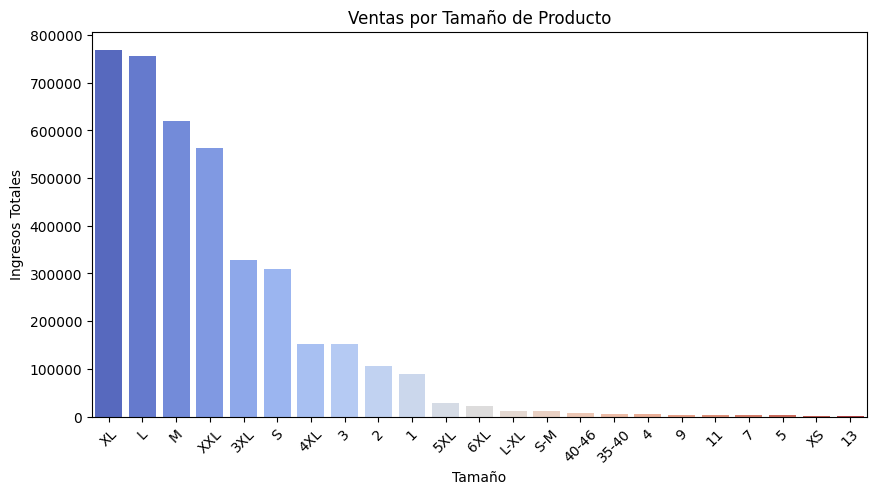

In [150]:
ventas_por_tamano = df_ventas.groupby('Size')['TotalVentas'].sum().sort_values(ascending=False)
print("Ventas por tamaño de producto:")
print(ventas_por_tamano)


plt.figure(figsize=(10, 5))
sns.barplot(x=ventas_por_tamano.index, y=ventas_por_tamano.values, palette='coolwarm')
plt.xlabel("Tamaño")
plt.ylabel("Ingresos Totales")
plt.title("Ventas por Tamaño de Producto")
plt.xticks(rotation=45) 
plt.show()

### 5. Tendecias Temporales

## **Análisis de inventario**

- Stock en producción


## **Análisis de preferencias del Cliente**

- Género y Línea de Producto
- Modelos Populares